In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_file(filename):
    img = cv2.imread(filename)
    print(img.shape)
    plt.figure()
    plt.imshow(img)

    return img

In [3]:
imgfolder = 'test_imgs/'
imgname = 'IMG_1742.JPG'
filename = imgfolder + imgname

(2048, 1365, 3)


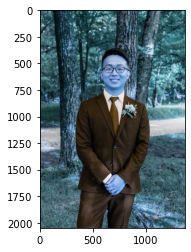

In [4]:
img = read_file(filename)

In [5]:
def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, line_size, blur_value)
    return edges

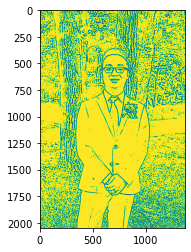

In [6]:
line_size = 9
blur_value = 5
edges = edge_mask(img, line_size, blur_value)
plt.figure()
plt.imshow(edges)

In [7]:
def color_quantization(img, k):
    # transform image
    data = np.float32(img).reshape((-1,3))
    
    # determine criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    
    # Implementing K-means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

In [8]:
total_color = 7
img = color_quantization(img, total_color)

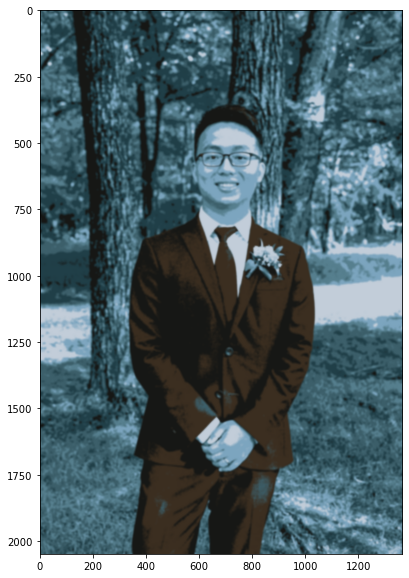

In [9]:
# after color quantization, we can reduce the noise in the image
blurred = cv2.bilateralFilter(img, d = 10, sigmaColor = 500, sigmaSpace = 500)
plt.figure(figsize = [10,10])
plt.imshow(blurred)


In [10]:
# Combine edge mask with the colored image
cartoon = cv2.bitwise_and(blurred, blurred, mask = edges)

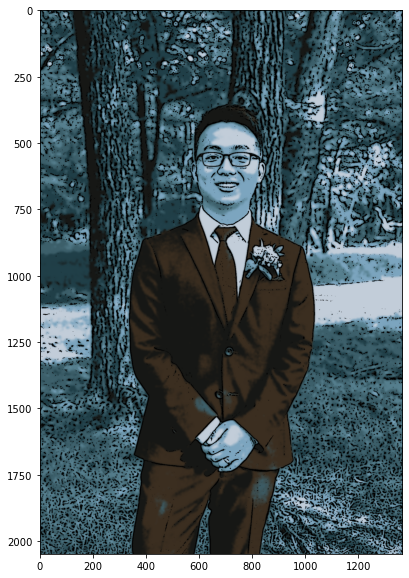

In [11]:
plt.figure(figsize = [10,10])
plt.imshow(cartoon)